<a href="https://colab.research.google.com/github/RajendranMS-2347248/CIAI-NNDL/blob/main/Rajendran_248_ETE3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 2 - CNN Autoencoder for Image Reconstruction

Objective:

Develop and evaluate a Convolutional Neural Network (CNN) Autoencoder to reconstruct images from a given dataset.

Instructions:

1. Dataset:

*   Use the Columbia University Object Image Library (COIL) dataset.
*   Split the dataset into training (80%) and testing (20%) sets.

2. Model Development:

*   Construct a CNN Autoencoder with:
  * Encoder: Use convolutional layers with ReLU activation to reduce the input image to a lower-dimensional latent representation.
  * Decoder: Use transpose convolutional layers to reconstruct the image from the latent space.



3. Training:

*   Use the Mean Squared Error (MSE) loss function.
*   Use Adam optimizer with a learning rate of 0.001.
*   Train the model for 20 epochs with a suitable batch size.

4. Evaluation:
*   Evaluate the model's performance using the testing set.
*   Visualize the reconstructed images and compare them to the original images.
*   Calculate and report the MSE on the test set.


5. Deliverables:
*   Submit the Python code with comments explaining each step.
*   Include the following outputs in the report:
    1. Architecture of the CNN Autoencoder.
    2. Loss curve during training.
    3. Original vs. reconstructed images (at least 5 examples).
    4. Final test MSE value.

In [1]:
import zipfile
import os

# Path to uploaded ZIP file
uploaded_zip_path = '/content/archive.zip'
extraction_path = '/content/coil-50/'

uploaded_zip_path = '/content/archive.zip'
if zipfile.is_zipfile(uploaded_zip_path):
    print("The file is a valid ZIP archive.")
else:
    print("The file is not a valid ZIP archive.")

# Extract the ZIP file
with zipfile.ZipFile(uploaded_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

# Check extracted contents
extracted_files = os.listdir(extraction_path)
print(f"Extracted {len(extracted_files)} files.")

The file is a valid ZIP archive.
Extracted 1 files.


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

# Set dataset path
dataset_path = extraction_path  # Directory with extracted images

# Load and preprocess images
image_size = (128, 128)  # Resize all images to 128x128
images = []
# Updated: Iterate through all subdirectories
for root, _, files in os.walk(dataset_path):
    for file_name in files:
        if file_name.endswith('.png'):  # Ensure only image files are loaded
            img_path = os.path.join(root, file_name)  # Get full image path
            # Open image and ensure it's in RGB format
            img = Image.open(img_path).convert('RGB').resize(image_size)  # Convert to RGB
            images.append(np.array(img) / 255.0)  # Normalize pixel values to [0, 1]

# Convert to NumPy array
images = np.array(images)
print(f"Loaded {images.shape[0]} images with shape {images.shape[1:]}.")

# Split into training and testing sets
train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
print(f"Training set: {train_images.shape}, Testing set: {test_images.shape}")

Loaded 1800 images with shape (128, 128, 3).
Training set: (1440, 128, 128, 3), Testing set: (360, 128, 128, 3)


In [3]:
# Define the autoencoder
def build_autoencoder(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    encoded = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)

    # Decoder
    x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = models.Model(inputs, decoded)
    return autoencoder

# Input shape
input_shape = (128, 128, 3)

# Build and compile the model
autoencoder = build_autoencoder(input_shape)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')
autoencoder.summary()

# Train the autoencoder
history = autoencoder.fit(
    train_images, train_images,
    validation_data=(test_images, test_images),
    epochs=20,
    batch_size=32,
    shuffle=True
)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 64, 64, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 3)         │             867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 186,371 (728.01 KB)

 Trainable params: 186,371 (728.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 93ms/step - loss: 0.0806 - val_loss: 0.0084
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0060 - val_loss: 0.0040
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0035 - val_loss: 0.0029
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0028 - val_loss: 0.0024
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 9/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 10/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 11/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 12/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.

In [4]:
# Evaluate the model on the test set
test_loss = autoencoder.evaluate(test_images, test_images)
print(f"Final Test MSE: {test_loss}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0011
Final Test MSE: 0.0010984415421262383


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step


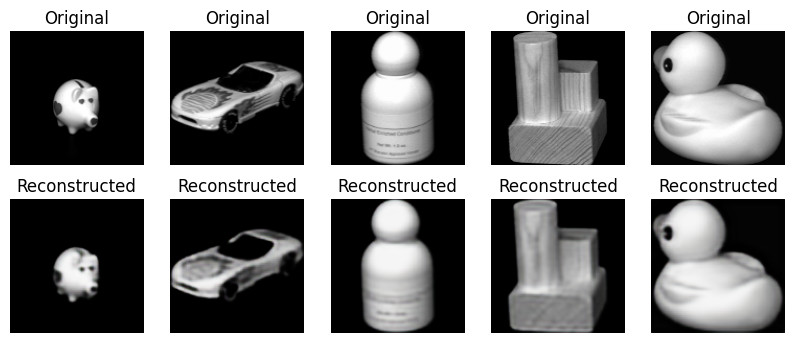

In [5]:
# Reconstruct some test images
decoded_images = autoencoder.predict(test_images[:5])

# Plot original vs reconstructed images
plt.figure(figsize=(10, 4))
for i in range(5):
    # Original images
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i])
    plt.title("Original")
    plt.axis("off")

    # Reconstructed images
    ax = plt.subplot(2, 5, i + 6)
    plt.imshow(np.clip(decoded_images[i], 0, 1))  # Ensure valid pixel values
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()


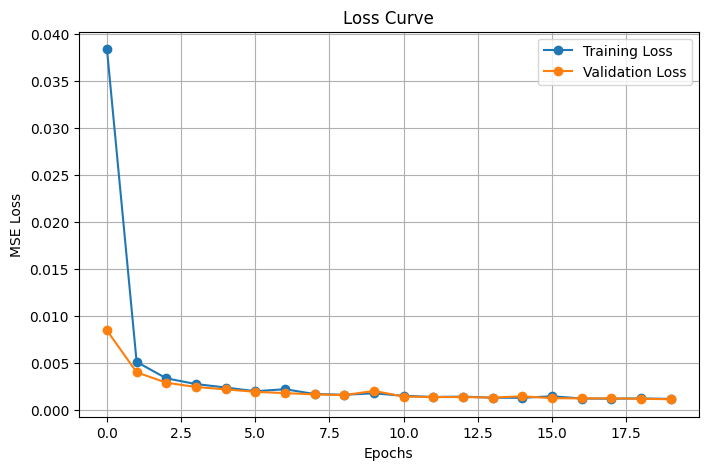

In [6]:
# Plot training and validation loss curves
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.legend()
plt.show()
